In [1]:
import numpy as np
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_prob = {}  # 存储类别的先验概率
        self.feature_prob = defaultdict(lambda: {})  # 存储每个特征在类别下的条件概率

    def fit(self, X, y):
        """
        训练朴素贝叶斯分类器
        :param X: 特征矩阵，形状为 (样本数, 特征数)
        :param y: 标签向量，形状为 (样本数,)
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)  # 获取所有类别

        # 计算类别的先验概率
        for cls in self.classes:
            self.class_prob[cls] = np.sum(y == cls) / n_samples

        # 计算每个特征在类别下的条件概率
        for cls in self.classes:
            for feature_idx in range(n_features):
                # 获取当前类别下某个特征的所有值
                feature_values = X[y == cls, feature_idx]
                # 统计特征值的频率
                unique_values, counts = np.unique(feature_values, return_counts=True)
                # 计算条件概率并存储
                for value, count in zip(unique_values, counts):
                    self.feature_prob[(feature_idx, value)][cls] = count / len(feature_values)

    def predict(self, X):
        """
        使用训练好的模型进行预测
        :param X: 特征矩阵，形状为 (样本数, 特征数)
        :return: 预测的类别
        """
        predictions = []
        for sample in X:
            # 初始化每个类别的后验概率
            posterior_probs = {}
            for cls in self.classes:
                # 计算类别的先验概率
                posterior_probs[cls] = self.class_prob[cls]
                # 计算特征的条件概率的乘积
                for feature_idx, value in enumerate(sample):
                    posterior_probs[cls] *= self.feature_prob.get((feature_idx, value), {}).get(cls, 1e-10)
            # 选择后验概率最大的类别作为预测结果
            predictions.append(max(posterior_probs, key=posterior_probs.get))
        return predictions


# 样本数据
X = np.array([
    [0, 2, 0, 1],  # 天气: 晴朗, 温度: 高, 湿度: 正常, 风: 有风
    [1, 1, 2, 0],  # 天气: 阴天, 温度: 低, 湿度: 高, 风: 无风
    [1, 0, 1, 1],  # 天气: 阴天, 温度: 正常, 湿度: 正常, 风: 有风
    [0, 1, 0, 0],  # 天气: 晴朗, 温度: 正常, 湿度: 高, 风: 无风
    [0, 2, 1, 1],  # 天气: 晴朗, 温度: 高, 湿度: 正常, 风: 有风
    [1, 1, 0, 0],  # 天气: 阴天, 温度: 低, 湿度: 高, 风: 无风
    [1, 0, 2, 1],  # 天气: 阴天, 温度: 正常, 湿度: 高, 风: 有风
    [0, 2, 1, 0],  # 天气: 晴朗, 温度: 高, 湿度: 正常, 风: 无风
    [0, 1, 0, 1],  # 天气: 晴朗, 温度: 正常, 湿度: 高, 风: 有风
    [1, 1, 1, 0],  # 天气: 阴天, 温度: 低, 湿度: 正常, 风: 无风
    [1, 0, 0, 0],  # 天气: 阴天, 温度: 正常, 湿度: 高, 风: 无风
    [0, 2, 1, 1],  # 天气: 晴朗, 温度: 高, 湿度: 正常, 风: 有风
    [1, 0, 1, 1],  # 天气: 阴天, 温度: 正常, 湿度: 正常, 风: 有风
    [0, 1, 0, 0]   # 天气: 晴朗, 温度: 正常, 湿度: 高, 风: 无风
])
y = np.array(['不打', '打', '打', '不打', '打', '打', '打', '不打', '不打', '打', '打', '不打', '打', '不打'])

# 创建并训练朴素贝叶斯分类器
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X, y)

# 进行预测
predictions = nb_classifier.predict(X)
print("预测结果:", predictions)

预测结果: ['不打', '打', '打', '不打', '不打', '打', '打', '不打', '不打', '打', '打', '不打', '打', '不打']


In [2]:
# 导入所需库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征（4个特征：花萼长度、宽度，花瓣长度、宽度）
y = iris.target  # 标签（3种鸢尾花类别）

# 划分训练集和测试集（默认比例：75%训练，25%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 创建高斯朴素贝叶斯分类器（适用于连续特征）
model = GaussianNB()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.2f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

准确率: 1.00

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

混淆矩阵:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


<Figure size 864x576 with 0 Axes>

C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 40482 (\N{CJK UNIFIED IDEOGRAPH-9E22}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23614 (\N{CJK UNIFIED IDEOGRAPH-5C3E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\

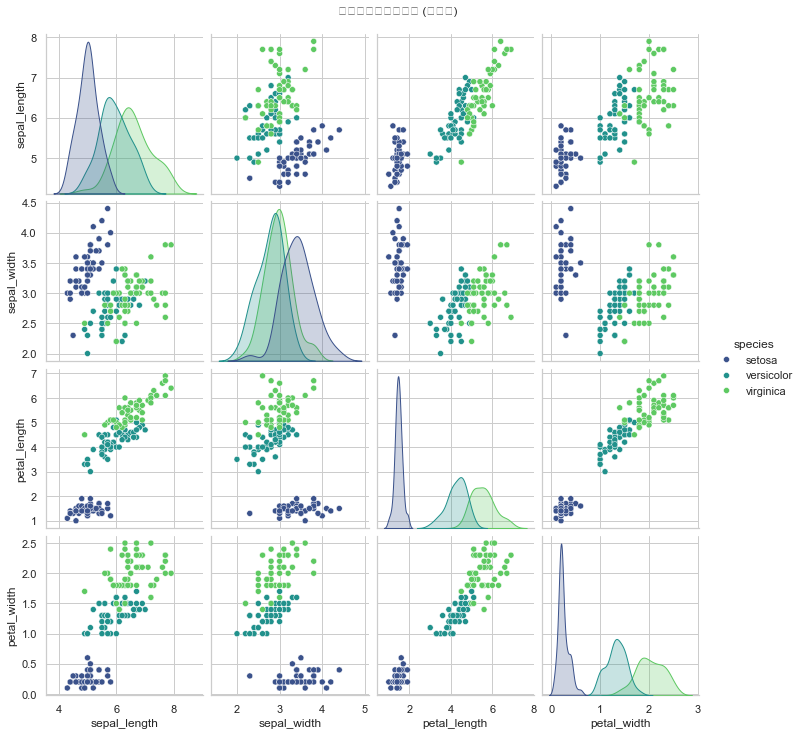

C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\

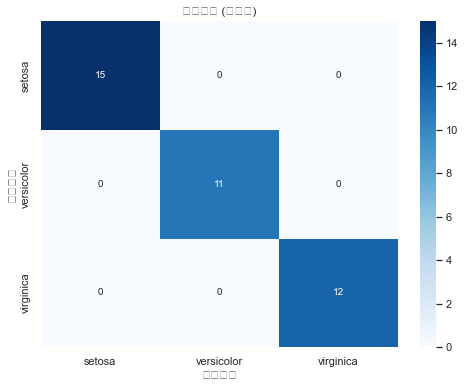

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\86173\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing

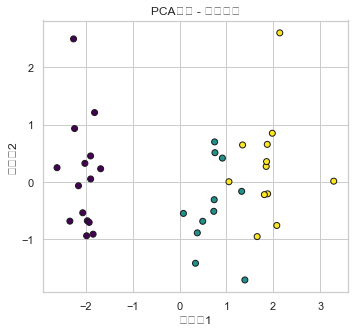

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 设置绘图风格
sns.set(style="whitegrid")

# ------------------------- 1. 特征分布可视化 -------------------------
# 绘制特征散点图矩阵（仅训练集）
plt.figure(figsize=(12, 8))
sns.pairplot(sns.load_dataset("iris"), hue="species", palette="viridis")
plt.suptitle("鸢尾花特征分布矩阵 (训练集)", y=1.02)
plt.show()

# ------------------------- 2. 混淆矩阵可视化 -------------------------
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵 (测试集)")
plt.show()

# ------------------------- 3. PCA降维可视化 -------------------------
# 标准化数据并降维到2D
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# 绘制PCA结果（真实标签 vs 预测标签）
plt.figure(figsize=(12, 5))

# 子图1：真实标签
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap="viridis", edgecolor="k")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.title("PCA降维 - 真实标签")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)

# 子图2：预测标签
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap="viridis", edgecolor="k")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.title("PCA降维 - 预测标签")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
data = pd.read_csv("./train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


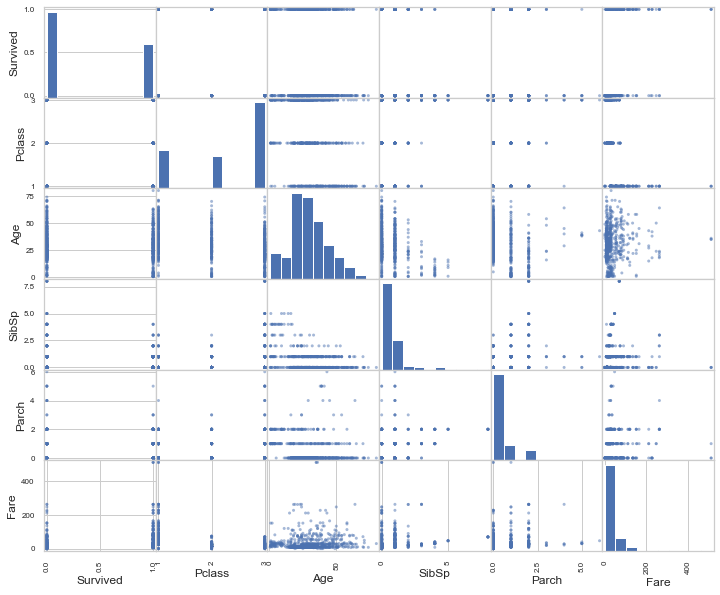

In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data.iloc[:,1:],figsize=(12,10))
plt.show()

In [8]:
import numpy as np
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
np.where(data["Embarked"]=="C",1,
 np.where(data["Embarked"]=="Q",2,3)))
col_name = ["Survived","Pclass","Sex_cleaned","Age","SibSp","Parch","Fare","Embarked_cleaned"]

In [9]:
data=data[col_name].dropna(axis=0, how='any')
data.head()

,Survived,Pclass,Sex_cleaned,Age,SibSp,Parch,Fare,Embarked_cleaned
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [10]:
X = data.loc[:,data.columns!='Survived']
y = data.loc[:,data.columns=='Survived']

In [11]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,random_state=2)
X_tr.shape,X_ts.shape

((535, 7), (179, 7))

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_tr,y_tr.values.ravel())

GaussianNB()

In [13]:
y_pred = gnb.predict(X_ts)
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
f1_score(y_ts,y_pred)

0.7368421052631579

In [14]:
scores = cross_val_score(gnb,X,y.values.ravel(),cv=5,scoring='f1')
print('5 fold cross validation f1-score: %.4f'%scores.mean())

5 fold cross validation f1-score: 0.7255


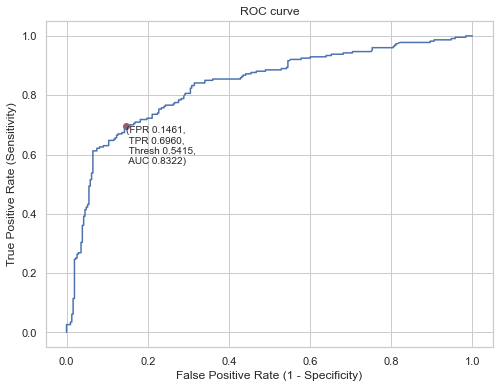

In [15]:
y_tr_pred_prob = gnb.predict_proba(X_tr)
y_tr_pred_prob = [y for x,y in y_tr_pred_prob]
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresh = roc_curve(y_tr, y_tr_pred_prob)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
idx = np.argmax(tpr-fpr)
Thresh = thresh[idx]
myAUC = roc_auc_score(y_tr, y_tr_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.scatter(fpr[idx],tpr[idx],c='r')
plt.text(fpr[idx],tpr[idx],'(FPR %.4f,\n TPR %.4f,\n Thresh %.4f,\n AUC %.4f)'%(fpr[idx],tpr[idx],Thresh,myAUC),va='top')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [16]:
y_ts_pred_prob = gnb.predict_proba(X_ts)
y_ts_pred = (y_ts_pred_prob[:,1]>Thresh) *1
y_ts_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [17]:
f1_score(y_ts,y_ts_pred)

0.732824427480916